In [64]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import linear, relu, sigmoid
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras import datasets, layers, models

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error 
from sklearn.model_selection import cross_val_score

from keras import regularizers
import math

In [2]:
df = pd.read_csv("sports.csv")
df.head()

,class id,filepaths,labels,data set
0,4,train/baseball/001.jpg,baseball,train
1,4,train/baseball/002.jpg,baseball,train
2,4,train/baseball/003.jpg,baseball,train
3,4,train/baseball/004.jpg,baseball,train
4,4,train/baseball/005.jpg,baseball,train


In [3]:
df["data set"].value_counts()

data set
train    2536
test       85
valid      85
Name: count, dtype: int64

In [4]:
df = df[df['data set'] == 'train']
df["data set"].value_counts()

data set
train    2536
Name: count, dtype: int64

In [5]:
df.drop(columns=['data set'], inplace=True)
df.head()

,class id,filepaths,labels
0,4,train/baseball/001.jpg,baseball
1,4,train/baseball/002.jpg,baseball
2,4,train/baseball/003.jpg,baseball
3,4,train/baseball/004.jpg,baseball
4,4,train/baseball/005.jpg,baseball


In [6]:
print(df['labels'].value_counts())
print(df['class id'].value_counts())

labels
football            191
formula 1 racing    190
nascar racing       189
baseball            174
hockey              172
basketball          169
golf                157
swimming            157
lacrosse            151
volleyball          142
fly fishing         134
tennis              131
water polo          130
bowling             120
snow boarding       117
boxing              116
ultimate             96
Name: count, dtype: int64
class id
1     191
2     190
3     189
4     174
5     172
6     169
7     157
8     157
9     151
10    142
11    134
12    131
13    130
14    120
15    117
16    116
0      96
Name: count, dtype: int64


In [7]:
image_arrays = []
for index, row in df.iterrows():
    img = load_img(row['filepaths'], target_size=(224, 224))
    img_array = img_to_array(img)
    image_arrays.append(img_array)

In [8]:
x_data = np.array(image_arrays)
x_data.shape

(2536, 224, 224, 3)

In [9]:
y_data = np.array(df['class id'])
y_data.shape

(2536,)

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42)

In [11]:
x_train = x_train/255
x_test = x_test/255

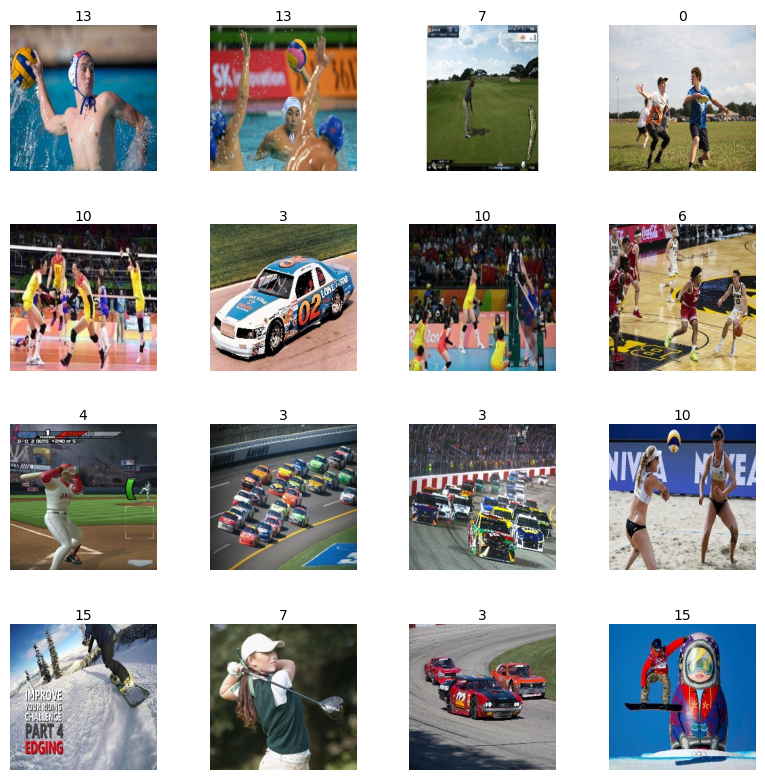

In [12]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

num_images_to_display = 16
random_indices = np.random.choice(x_train.shape[0], num_images_to_display, replace=False)

num_rows = 4  
num_cols = 4  
fig, axes = plt.subplots(num_rows, num_cols, figsize=(8, 8))
fig.tight_layout(pad=0.1)

for i, ax in enumerate(axes.flat):
    random_index = random_indices[i]
    ax.imshow(x_train[random_index])
    ax.set_axis_off()
    label = y_train[random_index]
    ax.set_title(str(label), fontsize=10, pad=3)
plt.show()

## Build Convolutional Neural Network

In [105]:
model = Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3), kernel_regularizer=regularizers.L2(0.005)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu', kernel_regularizer=regularizers.L2(0.005)))
model.add(layers.Dense(64, activation='relu', kernel_regularizer=regularizers.L2(0.005)))
model.add(layers.Dense(64, activation='relu', kernel_regularizer=regularizers.L2(0.005)))
model.add(layers.Dense(17, activation='softmax', kernel_regularizer=regularizers.L2(0.005)))

In [106]:
model.summary()

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_86 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_63 (MaxPooli  (None, 111, 111, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_87 (Conv2D)          (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_64 (MaxPooli  (None, 54, 54, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_88 (Conv2D)          (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_65 (MaxPooli  (None, 26, 26, 128)     

In [107]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(0.003),
    metrics=["accuracy"]
)

history = model.fit(
    x_train,y_train, epochs=30,
    validation_data=(x_test, y_test))

Epoch 1/30
64/64 [==============================] - 45s 669ms/step - loss: 4.4220 - accuracy: 0.0740 - val_loss: 3.4081 - val_accuracy: 0.0650
Epoch 2/30
64/64 [==============================] - 41s 644ms/step - loss: 3.1447 - accuracy: 0.1154 - val_loss: 2.9646 - val_accuracy: 0.0965
Epoch 3/30
64/64 [==============================] - 41s 638ms/step - loss: 2.8679 - accuracy: 0.1450 - val_loss: 2.8039 - val_accuracy: 0.1496
Epoch 4/30
64/64 [==============================] - 42s 649ms/step - loss: 2.7911 - accuracy: 0.1681 - val_loss: 2.8039 - val_accuracy: 0.1673
Epoch 5/30
64/64 [==============================] - 41s 643ms/step - loss: 2.6320 - accuracy: 0.2155 - val_loss: 2.5760 - val_accuracy: 0.2165
Epoch 6/30
64/64 [==============================] - 42s 652ms/step - loss: 2.5033 - accuracy: 0.2530 - val_loss: 2.5707 - val_accuracy: 0.2067
Epoch 7/30
64/64 [==============================] - 41s 644ms/step - loss: 2.4657 - accuracy: 0.2604 - val_loss: 2.4082 - val_accuracy: 0.2815

16/16 - 2s - loss: 2.6104 - accuracy: 0.4587 - 2s/epoch - 151ms/step


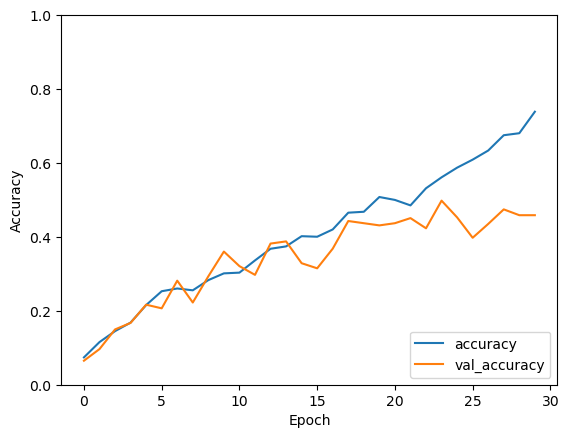

In [108]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

In [109]:
one_proba = model.predict(x_test[:3])
one_proba

1/1 [==============================] - 0s 150ms/step


array([[1.37623909e-04, 2.66566713e-05, 3.70827201e-03, 9.95614767e-01,
        2.03797725e-07, 2.05758170e-06, 1.13970475e-06, 5.01287865e-08,
        1.05191145e-08, 4.26666433e-04, 1.52905750e-06, 5.56426457e-05,
        2.03368891e-05, 5.28491362e-10, 4.75370125e-11, 4.98982308e-06,
        5.48335315e-08],
       [7.93828666e-02, 5.34352243e-01, 4.48743580e-04, 2.66234251e-03,
        5.91840595e-02, 2.78367405e-03, 8.17530043e-03, 4.42770682e-02,
        6.48416171e-05, 2.07074463e-01, 4.08974197e-03, 1.75264652e-03,
        5.16806878e-02, 1.45539831e-04, 2.09992914e-03, 1.61476468e-03,
        2.11132690e-04],
       [3.40412953e-05, 7.04597274e-04, 5.77797546e-05, 2.85223396e-05,
        2.72139441e-02, 3.37817655e-05, 3.73954654e-01, 1.72671949e-04,
        3.36409830e-05, 6.75234162e-07, 3.66285816e-02, 1.35416980e-03,
        8.17799009e-03, 8.17141427e-06, 1.40258700e-01, 4.63381980e-07,
        4.11337584e-01]], dtype=float32)

In [110]:
y_hat=[]
for prediction in one_proba:
    y_hat.append(np.argmax(prediction))
print(f"first three predictions after threshold: {y_hat}")
print(f"first three labels in training set: {y_test[:3]}")

first three predictions after threshold: [3, 1, 16]
first three labels in training set: [ 3  4 16]


In [111]:
model.evaluate(x_train, y_train)

64/64 [==============================] - 9s 145ms/step - loss: 1.2105 - accuracy: 0.7811


[1.210507869720459, 0.7810651063919067]

In [112]:
model.evaluate(x_test, y_test)

16/16 [==============================] - 2s 139ms/step - loss: 2.6104 - accuracy: 0.4587


[2.6104254722595215, 0.45866140723228455]

## Build a normal sequential Neural Network to compare to the CNN

In [129]:
model = Sequential(
    [       
        tf.keras.layers.Flatten(input_shape=[224, 224, 3]),
        Dense(64, activation='relu'),
        Dense(64, activation='relu'),
        Dense(64, activation='relu'),
        Dense(17, activation='sigmoid')
    ]
)        

In [130]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(0.001),
    metrics=["accuracy"]
)

history = model.fit(
    x_train,y_train, epochs=20,
    validation_data=(x_test, y_test))

Epoch 1/20
64/64 [==============================] - 6s 86ms/step - loss: 10.4633 - accuracy: 0.0863 - val_loss: 3.1361 - val_accuracy: 0.1004
Epoch 2/20
64/64 [==============================] - 5s 82ms/step - loss: 2.8618 - accuracy: 0.1548 - val_loss: 3.8533 - val_accuracy: 0.1083
Epoch 3/20
64/64 [==============================] - 5s 84ms/step - loss: 2.6604 - accuracy: 0.1893 - val_loss: 3.3277 - val_accuracy: 0.1339
Epoch 4/20
64/64 [==============================] - 5s 82ms/step - loss: 2.5197 - accuracy: 0.2318 - val_loss: 2.4719 - val_accuracy: 0.2303
Epoch 5/20
64/64 [==============================] - 5s 82ms/step - loss: 2.4047 - accuracy: 0.2490 - val_loss: 2.7310 - val_accuracy: 0.2165
Epoch 6/20
64/64 [==============================] - 5s 83ms/step - loss: 2.0795 - accuracy: 0.3358 - val_loss: 2.4750 - val_accuracy: 0.2283
Epoch 7/20
64/64 [==============================] - 5s 83ms/step - loss: 2.0279 - accuracy: 0.3476 - val_loss: 2.8621 - val_accuracy: 0.1850
Epoch 8/20
6

16/16 - 0s - loss: 2.7703 - accuracy: 0.2500 - 140ms/epoch - 9ms/step


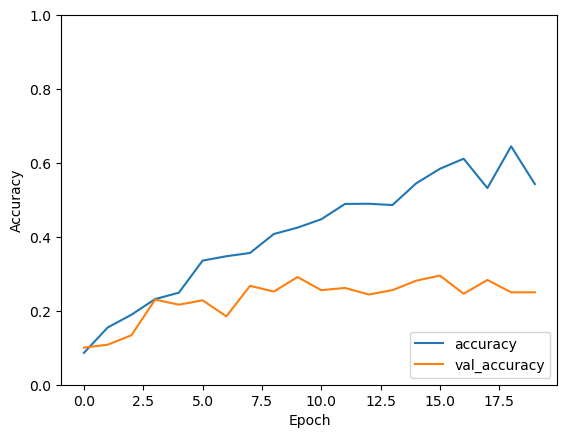

In [131]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

In [132]:
y_hat=[]
for prediction in one_proba:
    y_hat.append(np.argmax(prediction))
print(f"first three predictions after threshold: {y_hat}")
print(f"first three labels in training set: {y_test[:3]}")

first three predictions after threshold: [3, 1, 16]
first three labels in training set: [ 3  4 16]


In [133]:
model.evaluate(x_train, y_train)

64/64 [==============================] - 1s 10ms/step - loss: 1.0608 - accuracy: 0.6519


[1.0607563257217407, 0.651873767375946]

In [134]:
model.evaluate(x_test, y_test)

16/16 [==============================] - 0s 10ms/step - loss: 2.7703 - accuracy: 0.2500


[2.770263195037842, 0.25]